✅ Datos cargados. Valores faltantes introducidos:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


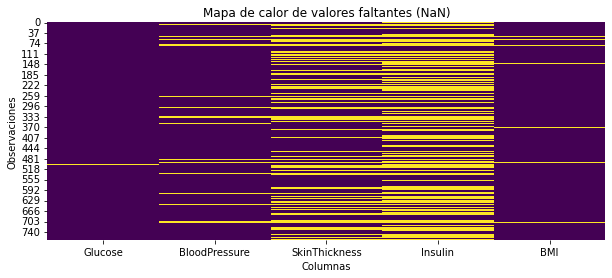

Conteo de valores faltantes por columna:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2 as chi2_dist

# -----------------------------------------------------------
# 1. Cargar el dataset y preparar los valores faltantes
# -----------------------------------------------------------

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columnas = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
df = pd.read_csv(url, names=columnas)

# Reemplazar ceros por NaN en columnas donde cero no es válido
cols_with_nan = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_nan] = df[cols_with_nan].replace(0, np.nan)

print("✅ Datos cargados. Valores faltantes introducidos:")
display(df.head())

# -----------------------------------------------------------
# 2. Visualización de valores faltantes
# -----------------------------------------------------------

plt.figure(figsize=(10, 4))
sns.heatmap(df[cols_with_nan].isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de valores faltantes (NaN)")
plt.xlabel("Columnas")
plt.ylabel("Observaciones")
plt.show()

print("Conteo de valores faltantes por columna:")
print(df[cols_with_nan].isnull().sum())


In [16]:
# -----------------------------------------------------------
# 3. Función para obtener patrones de valores faltantes
# -----------------------------------------------------------

def obtener_patrones(df, columnas):
    """
    Esta función identifica patrones únicos de valores faltantes (NaN)
    en un conjunto de columnas específicas.

    Parámetros:
    df: DataFrame original.
    columnas: Lista de columnas en las que se desea buscar valores faltantes.

    Retorna:
    Serie con una cadena binaria por fila, donde:
    - '0' indica que el valor está presente
    - '1' indica que el valor está ausente (NaN)
    """

    # Paso 1: Identificar si hay NaN por celda, devuelve True/False
    nulos = df[columnas].isnull()

    # Paso 2: Convertir True/False a 1/0 para codificar
    nulos_codificados = nulos.astype(int)

    # Paso 3: Unir cada fila como una cadena binaria, ejemplo: '01001'
    patrones = nulos_codificados.apply(lambda fila: ''.join(fila.astype(str)), axis=1)

    return patrones


# -----------------------------------------------------------
# Aplicar la función al dataframe
# -----------------------------------------------------------
df['pattern'] = obtener_patrones(df, cols_with_nan)

# -----------------------------------------------------------
# Ejemplo visual de los primeros patrones detectados
# -----------------------------------------------------------
print("📌 Ejemplo de patrones de valores faltantes:")
display(df[['pattern'] + cols_with_nan].head(20))



📌 Ejemplo de patrones de valores faltantes:


,pattern,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,00010,148.0,72.0,35.0,NaN,33.6
1,00010,85.0,66.0,29.0,NaN,26.6
2,00110,183.0,64.0,NaN,NaN,23.3
3,00000,89.0,66.0,23.0,94.0,28.1
4,00000,137.0,40.0,35.0,168.0,43.1
5,00110,116.0,74.0,NaN,NaN,25.6
6,00000,78.0,50.0,32.0,88.0,31.0
7,01110,115.0,NaN,NaN,NaN,35.3
8,00000,197.0,70.0,45.0,543.0,30.5
9,00111,125.0,96.0,NaN,NaN,NaN


🔎 ¿Qué significa cada patrón?
Cada patrón representa una combinación única de presencia/ausencia de datos.

Ejemplo:

'00000' → no hay valores faltantes en ninguna columna

'10000' → solo falta el valor en la primera columna (Glucose)

'01100' → faltan BloodPressure y SkinThickness, los demás están presentes

Esto permite agrupar observaciones por tipo de ausencia, lo cual es esencial para la prueba de Little (se evalúa si el patrón de valores faltantes está relacionado con la media de los datos disponibles).

C:\Users\lfvvi\AppData\Local\Temp\ipykernel_20512\1671660820.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pat_freq.index, y=pat_freq.values, palette="viridis")
C:\Users\lfvvi\AppData\Local\Temp\ipykernel_20512\1671660820.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\lfvvi\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


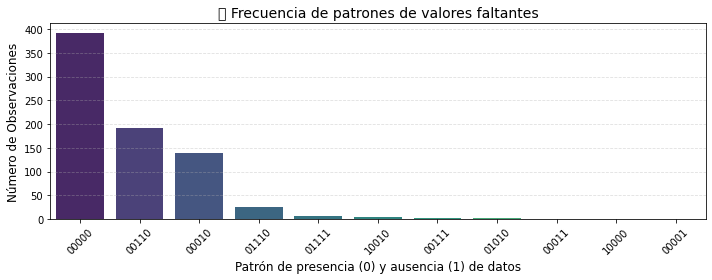

In [15]:
# -----------------------------------------------------------
# Calcular la frecuencia de cada patrón
# -----------------------------------------------------------
pat_freq = df['pattern'].value_counts().sort_values(ascending=False)

# -----------------------------------------------------------
# Gráfico de barras de los patrones
# -----------------------------------------------------------
plt.figure(figsize=(10, 4))
sns.barplot(x=pat_freq.index, y=pat_freq.values, palette="viridis")

plt.title("📊 Frecuencia de patrones de valores faltantes", fontsize=14)
plt.ylabel("Número de Observaciones", fontsize=12)
plt.xlabel("Patrón de presencia (0) y ausencia (1) de datos", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [7]:
# -----------------------------------------------------------
# 4. Prueba de Little: implementación sin librerías externas
# -----------------------------------------------------------
def prueba_little(df, columnas):
    df = df.copy()
    df['pattern'] = obtener_patrones(df, columnas)
    
    # Calcular media y covarianza de casos completos
    completos = df[df['pattern'] == '00000']
    mu = completos[columnas].mean()
    Sigma = completos[columnas].cov()
    Sigma_inv = np.linalg.inv(Sigma)

    chi2_total = 0
    total_gl = 0
    patrones_usados = 0

    for pattern, grupo in df.groupby('pattern'):
        observadas = [col for col, flag in zip(columnas, pattern) if flag == '0']
        if len(observadas) == 0 or len(grupo) < 2:
            continue  # No se puede calcular con menos de 2 observaciones

        # Medias por patrón
        x_g_bar = grupo[observadas].mean()
        mu_g = mu[observadas]

        # Submatriz de covarianza
        Sigma_g = Sigma.loc[observadas, observadas]
        Sigma_g_inv = np.linalg.inv(Sigma_g)

        # Estadístico chi2 para el grupo
        diff = (x_g_bar - mu_g).values.reshape(-1, 1)
        chi2 = len(grupo) * float(diff.T @ Sigma_g_inv @ diff)
        chi2_total += chi2

        total_gl += len(observadas)
        patrones_usados += 1

    # Grados de libertad: suma(p_g) - G * p
    p = len(columnas)
    gl = total_gl - patrones_usados * p
    p_value = 1 - chi2_dist.cdf(chi2_total, df=gl)

    return chi2_total, gl, p_value


In [10]:
# -----------------------------------------------------------
# 5. Aplicar prueba y mostrar resultados
# -----------------------------------------------------------
chi2, gl, p_valor = prueba_little(df, cols_with_nan)

print(f"📊 Estadístico Chi-cuadrado: {chi2:.4f}")
print(f"📐 Grados de libertad: {gl}")
print(f"📈 Valor p: {p_valor:.4f}")

if p_valor > 0.05:
    print("✅ No se rechaza la hipótesis nula: los datos faltan completamente al azar (MCAR).")
else:
    print("❌ Se rechaza la hipótesis nula: los datos NO faltan completamente al azar (posible MAR o MNAR).")


📊 Estadístico Chi-cuadrado: 85.8608
📐 Grados de libertad: -17
📈 Valor p: nan
❌ Se rechaza la hipótesis nula: los datos NO faltan completamente al azar (posible MAR o MNAR).


C:\Users\lfvvi\AppData\Local\Temp\ipykernel_20512\2388611433.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  chi2 = len(grupo) * float(diff.T @ Sigma_g_inv @ diff)
C:\Users\lfvvi\AppData\Local\Temp\ipykernel_20512\2388611433.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  chi2 = len(grupo) * float(diff.T @ Sigma_g_inv @ diff)
C:\Users\lfvvi\AppData\Local\Temp\ipykernel_20512\2388611433.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  chi2 = len(grupo)